# ML linear regression - assignment 1

In this assignment, we will predict the price of a house by its region, size, number of bedrooms, etc.

## Introduction

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import urllib.request
import pytest
import ipytest
import unittest

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

ipytest.autoconfig()

df = pd.read_csv("../../assets/data/housing.csv")

In [85]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Features | Informations
--- | --- |
`longitude` | A measure of how far west a house is; a higher value is farther west
`latitude` | A measure of how far north a house is; a higher value is farther north
`housing_median_age` | Median age of a house within a block; a lower number is a newer building
`total_rooms` | Total number of rooms within a block
`total_bedrooms` | Total number of bedrooms within a block
`population` | Total number of people residing within a block
`households` | Total number of households, a group of people residing within a home unit, for a block
`median_income` | Median income for households within a block of houses (measured in tens of thousands of US Dollars)
`median_house_value` | Median house value for households within a block (measured in US Dollars)
`oceanProximity` | Location of the house w.r.t ocean/sea

Source: Kaggle

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [88]:
len(df)

20640

In [89]:
len(df.columns)

10

So, we have 20640 data points and 10 features. In those 10 features, 9 features are input features and the feature `median_house_value` is the target variable/label.

## Task

### Task 1: Exploratory data analysis

#### Split the data set into a training set and a test set

In [90]:
train_data, test_data = train_test_split(df, test_size=0.1,random_state=20)

#### Checking data statistics

In [91]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,18576,NaN,NaN,NaN,-119.568,2.00058,-124.35,-121.79,-118.49,-118.01,-114.49
latitude,18576,NaN,NaN,NaN,35.6302,2.13326,32.54,33.93,34.26,37.71,41.95
housing_median_age,18576,NaN,NaN,NaN,28.6611,12.604,1,18,29,37,52
total_rooms,18576,NaN,NaN,NaN,2631.57,2169.47,2,1445,2127,3149,39320
total_bedrooms,18390,NaN,NaN,NaN,537.345,417.673,1,295,435,648,6445
population,18576,NaN,NaN,NaN,1422.41,1105.49,3,785.75,1166,1725,28566
households,18576,NaN,NaN,NaN,499.277,379.473,1,279,410,606,6082
median_income,18576,NaN,NaN,NaN,3.87005,1.90022,0.4999,2.5643,3.5341,4.74273,15.0001
median_house_value,18576,NaN,NaN,NaN,206881,115238,14999,120000,179800,264700,500001
ocean_proximity,18576,5,<1H OCEAN,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking missing values

In [92]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [93]:
print('The Percentage of missing values in total_bedrooms is: {}%'.format(train_data.isnull().sum()['total_bedrooms'] / len(train_data) * 100))

The Percentage of missing values in total_bedrooms is: 1.0012919896640826%


#### Checking values in the categorical feature(s)

In [94]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

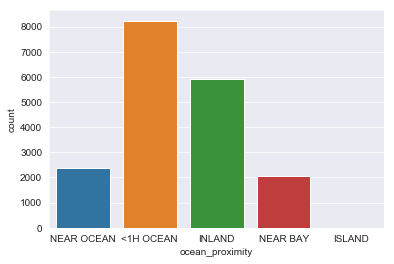

In [95]:
sns.countplot(data=train_data, x='ocean_proximity')

#### Checking Correlation Between Features

In [96]:
correlation = train_data.corr()
correlation['median_house_value']

longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

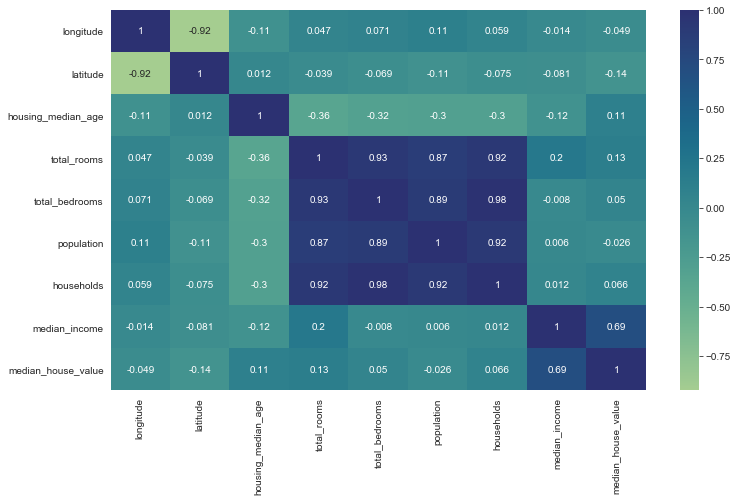

In [97]:
plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

Some features like total_bedrooms and households are highly correlated. Same things for `total_bedrooms` and `total_rooms` and that makes sense because for many houses, the number of people who stay in that particular house (`households`) goes with the number of available rooms(`total_rooms`) and `bed_rooms`.

The other interesting insights is that the `price of the house` is closely correlated with the `median income`, and that makes sense too. For many cases, you will resonably seek house that you will be able to afford based on your income.

#### Plotting geographical features

Since we have latitude and longitude, let's plot it. It can help us to know the location of certain houses on the map and hopefully this will resemble California map.

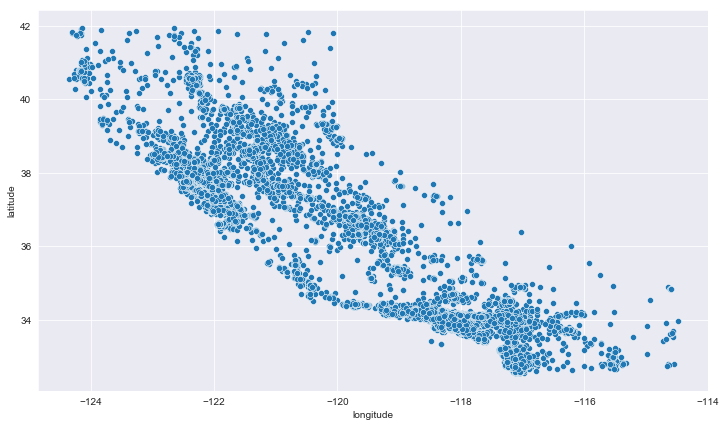

In [98]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude')

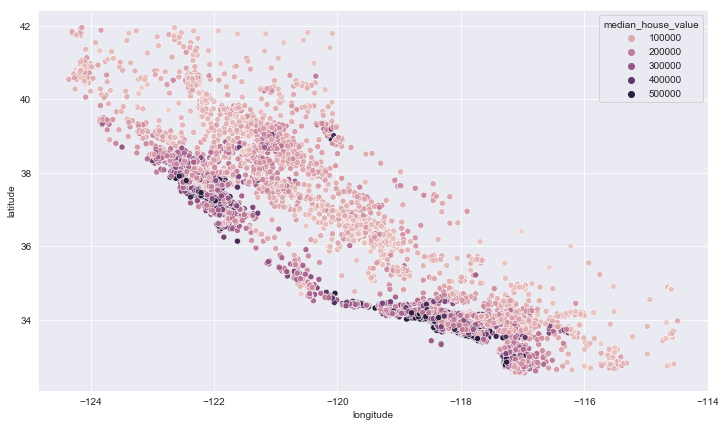

In [99]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

It makes sense that the most expensive houses are those close to sea. We can verify that with the `ocean_proximity`.

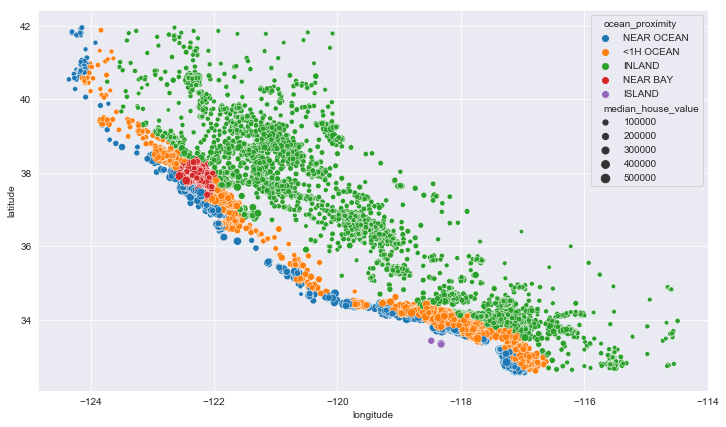

In [100]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

Yup, all houses near the ocean are very expensive compared to other areas.

#### Exploring Relationship Between Individual Features

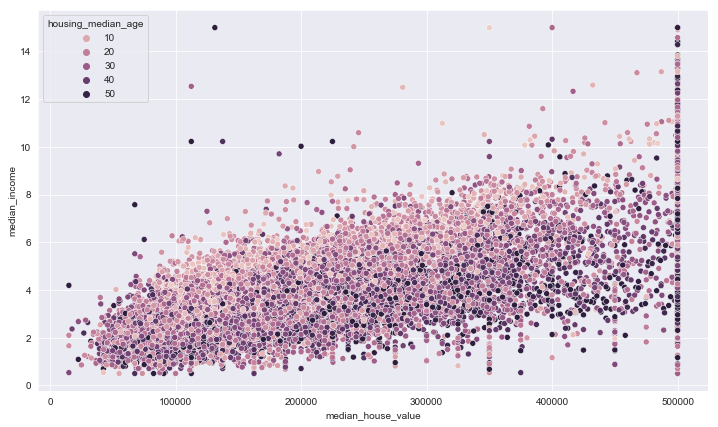

In [101]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue='housing_median_age')

There are times you want to quickly see different plots to draw insights from the data. In that case, you can use grid plots. Seaborn, a visualization library provides a handy function for that.

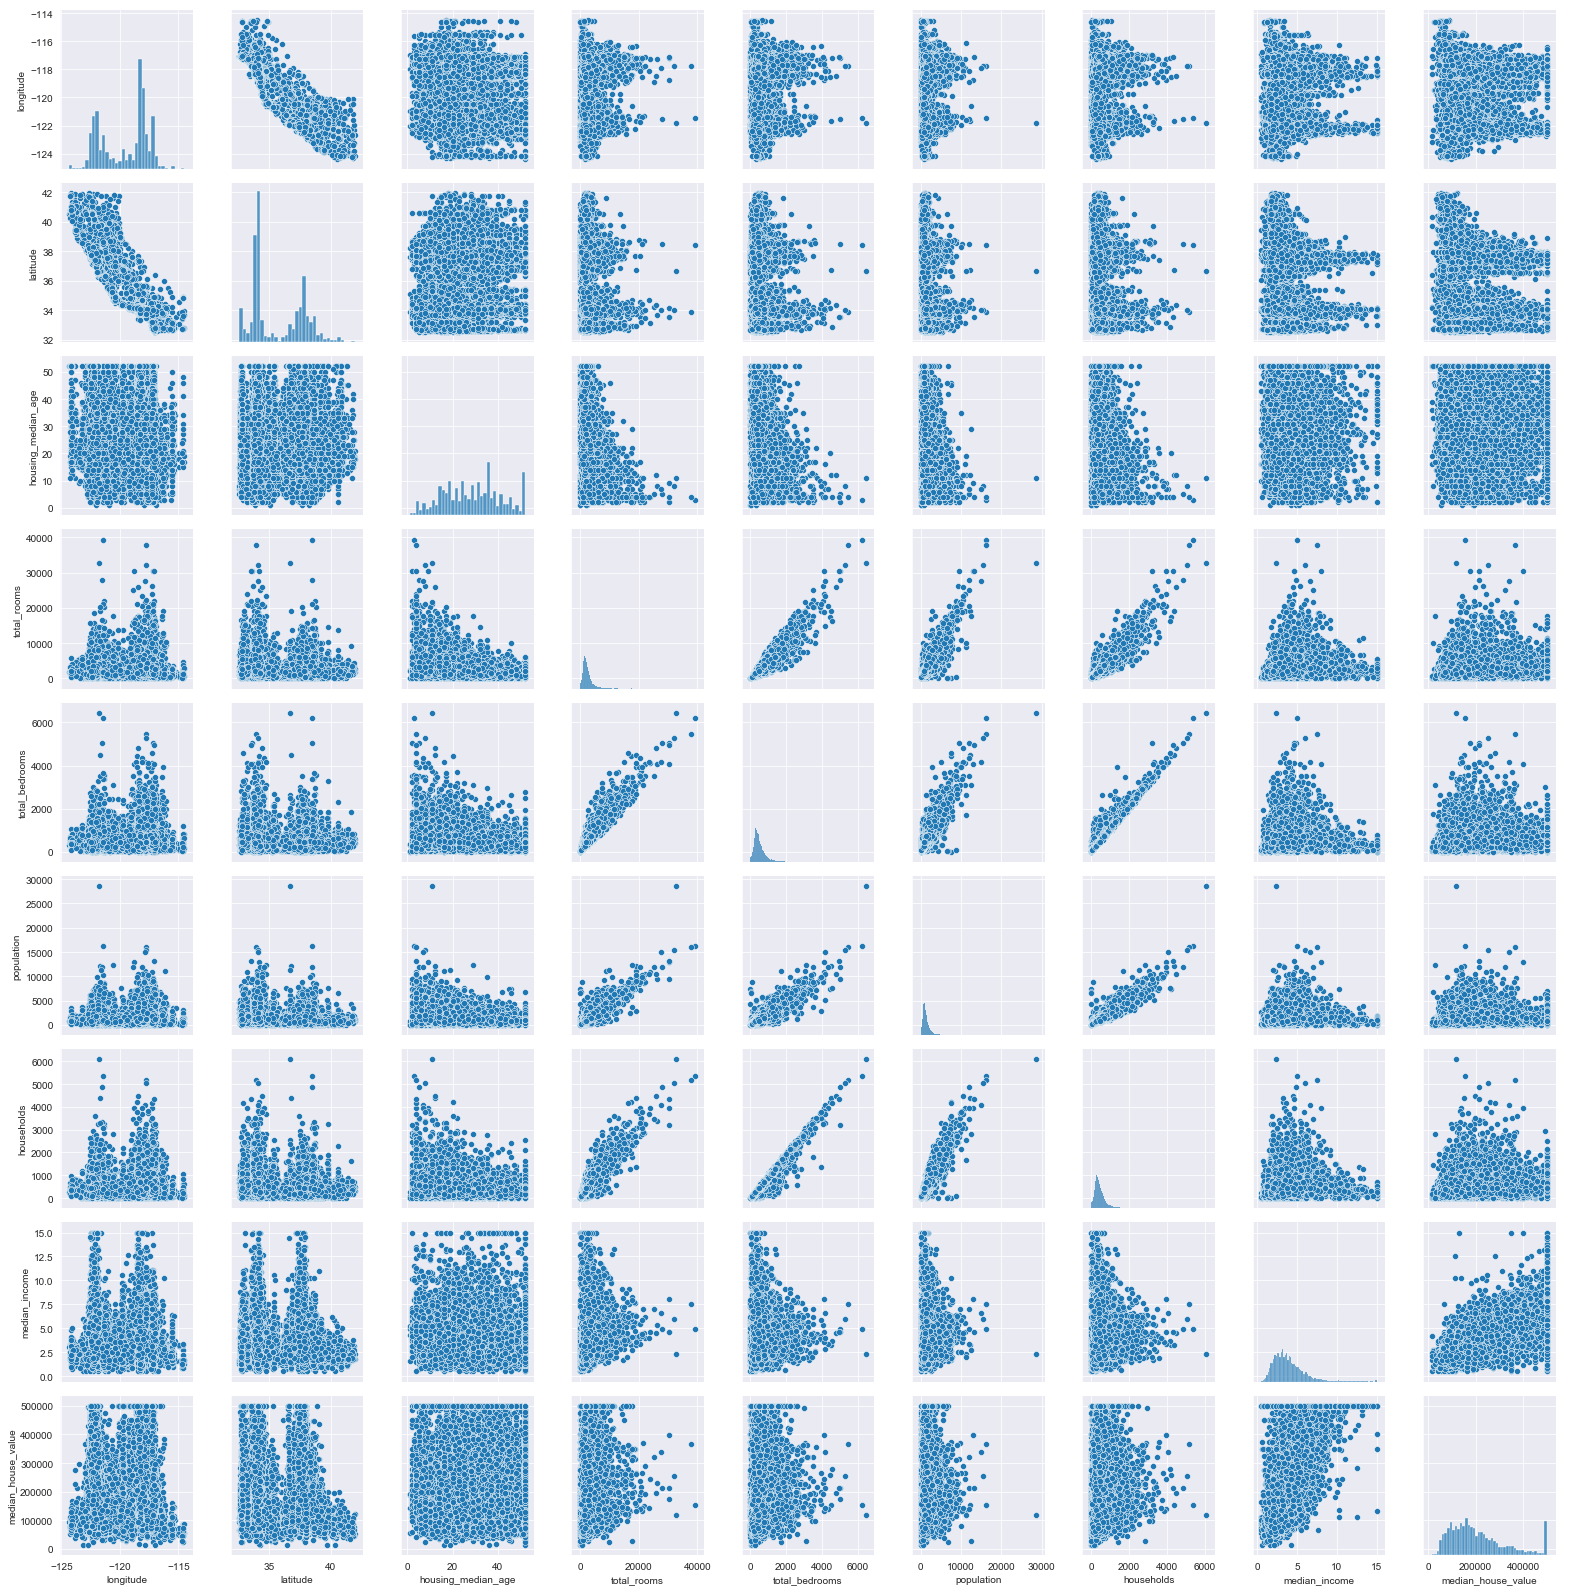

In [102]:
sns.pairplot(train_data)

As you can see, it plots the relationship between all numerical features and histograms of each feature as well. But it's slow...

To summarize the data exploration, the goal here it to understand the data as much as you can. There is no limit to what you can inspect. And understanding the data will help you build an effective ML systems.

### Task 3: Data preprocessing

#### Create the input data and output data for training the machine learning model

Since we are going to prepare the data for the ML model, let's create an input training data and the training label, label being `median_house_value`.

In [103]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [104]:
training_input_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,NEAR OCEAN
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,<1H OCEAN
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,NEAR OCEAN
11742,-121.15,38.91,23.0,1654.0,299.0,787.0,299.0,4.2723,INLAND
1871,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,INLAND


In [105]:
training_labels.head()

8101     150800.0
9757     114700.0
16837    273000.0
11742    193100.0
1871     173400.0
Name: median_house_value, dtype: float64

#### Handling missing values

In this example, we will fill the values with the mean of the concerned features.

In [106]:
# We are going to impute all numerical features
# Ideally, we would only impute bed_rooms because it's the one possessing NaNs
num_feats = training_input_data.drop('ocean_proximity', axis=1)

def handle_missing_values(input_data):
  """
  Docstring 

  # This is a function to take numerical features...
  ...and impute the missing values
  # We are filling missing values with mean
  # fit_transform fit the imputer on input data and transform it immediately
  # You can use fit(input_data) and then transform(input_data) or
  # Or do it at once with fit.transform(input_data)
  # Imputer returns the imputed data as a NumPy array 
  # We will convert it back to Pandas dataframe

  """
  mean_imputer = SimpleImputer(strategy='mean')
  num_feats_imputed = mean_imputer.fit_transform(input_data)
  num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                            columns=input_data.columns, index=input_data.index )


  return num_feats_imputed

In [107]:
num_feats_imputed = handle_missing_values(num_feats)
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

The feature `total_bedroom` was the one having missing values. Looking above, we no longer have the missing values in whole dataframe.

#### Encoding categorical features

Categorical features are features which have categorical values. An example in our dataset is `ocean_proximity` that has the following values.

In [108]:
training_input_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

So we have 5 categories: `<1H OCEAN`, `INLAND`, `NEAR OCEAN`, `NEAR BAY`, `ISLAND`.

##### Mapping

Mapping is simple. We create a dictionary of categorical values and their corresponding numerics. And after that, we map it to the categorical feature.

In [109]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [110]:
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)

In [111]:
cat_feats_encoded.head()

8101     2
9757     0
16837    2
11742    1
1871     1
Name: ocean_proximity, dtype: int64

Cool, all categories were mapped to their corresponding numerals. That is actually encoding. We are converting the categories (in text) into numbers, typically because ML models expect numeric inputs.

##### Handling categorical features with Sklearn

Sklearn has many preprocessing functions to handle categorical features. Ordinary Encoder is one of them. It does the same as what we did before with mapping. The only difference is implementation.

In [112]:
from sklearn.preprocessing import OrdinalEncoder

def ordinary_encoder(input_data):
  encoder = OrdinalEncoder()
  output = encoder.fit_transform(input_data)
  return output

In [113]:
cat_feats = training_input_data[['ocean_proximity']]

cat_feats_enc = ordinary_encoder(cat_feats)
cat_feats_enc

array([[4.],
       [0.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

##### One hot encoding

One hot encoding is most preferred when the categories are not in any order and that is exactly how our categorical feature is. This is what I mean by saying unordered categories: If you have 3 cities and encode them with numbers (1,2,3) respectively, a machine learning model may learn that city 1 is close to city 2 and to city 3. As that is a false assumption to make, the model will likely give incorrect predictions if the city feature plays an important role in the analysis.

On the flip side, if you have the feature of ordered ranges like low, medium, and high, then numbers can be an effective way because you want to keep the sequence of these ranges.

In our case, the ocean proximity feature is not in any order. By using one hot, The categories will be converted into binary representation (1s or 0s), and the orginal categorical feature will be splitted into more features, equivalent to the number of categories.

In [114]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(input_data):
  one_hot_encoder = OneHotEncoder()
  output = one_hot_encoder.fit_transform(input_data)
  
  # The output of one hot encoder is a sparse matrix. 
  # It's best to convert it into numpy array 
  output = output.toarray()

  return output

In [115]:
cat_feats = training_input_data[['ocean_proximity']]

cat_feats_hot = one_hot(cat_feats)

cat_feats_hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Cool, we now have one hot matrix, where categories are represented in 1s or 0s. As one hot create more additional features, if you have a categorical feature having many categories, it can be too much, hence resulting in poor performance.

#### Scaling numerical 

Most machine learning models will work well when given small input values, and best if they are in the same range. For that reason, there are two most techniques to scale features:

* Normalization where the features are scaled to values between 0 and 1. And
* Standardization where the features are rescaled to have 0 mean and unit standard deviation. When working with datasets containing outliers (such as time series), standardization is the right option in that particular case.

In [116]:
## Normalizing numerical features 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[0.62271805, 0.13390011, 0.78431373, ..., 0.03676084, 0.04555172,
        0.19157667],
       [0.29513185, 0.4218916 , 0.58823529, ..., 0.05129013, 0.05558296,
        0.18772155],
       [0.18965517, 0.53666312, 0.54901961, ..., 0.09736372, 0.1516198 ,
        0.3378712 ],
       ...,
       [0.74340771, 0.02763018, 0.58823529, ..., 0.03942163, 0.07383654,
        0.27298934],
       [0.61663286, 0.16578108, 0.78431373, ..., 0.04764906, 0.11609933,
        0.36398808],
       [0.19269777, 0.55791711, 0.88235294, ..., 0.02653783, 0.07432988,
        0.22199004]])

In [117]:
## Standardizing numerical features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

#### Putting all data preprocessing steps into a single pipeline

We are going to do three things:

* Creating a numerical pipeline having all numerical preprocessing steps (handling missing values and standardization)
* Creating a categorical pipeline to encode the categorical features
* Combining both pipelines into one pipeline.

##### Creating a numerical features pipeline

In [118]:
from sklearn.pipeline import Pipeline

num_feats_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='mean')), 
                  ('scaler', StandardScaler())         
            ])

num_feats_preprocessed = num_feats_pipe.fit_transform(num_feats)

num_feats_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

In [119]:
num_feats_pipe.steps[0]

('imputer', SimpleImputer())

In [120]:
num_feats_pipe.steps[1]

('scaler', StandardScaler())

##### Pipeline for transforming categorical features

In [121]:
cat_feats_pipe = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_preprocessed = cat_feats_pipe.fit_transform(cat_feats)

In [122]:
type(cat_feats_preprocessed)

scipy.sparse.csr.csr_matrix

##### Final data processing pipeline

In [123]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', cat_feats_pipe, cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [124]:
training_data_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

In [125]:
type(training_data_preprocessed)

numpy.ndarray

### Choosing and training a model

In [126]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [127]:
reg_model.fit(training_data_preprocessed, training_labels)

LinearRegression()

Great, that was fast! The model is now trained on the training set.

Before we evaluate the model, let's take things little deep.

Have you heard of things called weights and bias? These are two paremeters of any typical ML model. It is possible to access the model paremeters, here is how.

In [128]:
# Coef or coefficients are referred to as weights

reg_model.coef_

array([-55263.30927452, -56439.9137407 ,  13168.07604103,  -7925.04690235,
        27745.66496461, -50635.65732685,  35554.21578029,  72788.96303579,
       -22102.99609181, -60373.27017952, 127304.48624811, -26150.80577065,
       -18677.41420614])

In [129]:
# Intercept is what can be compared to the bias 

reg_model.intercept_

241108.24591009185

### Model evaluation

In [130]:
from sklearn.metrics import mean_squared_error

predictions = reg_model.predict(training_data_preprocessed)

In [131]:
mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse 

68438.90385283885

In [132]:
train_data.describe().median_house_value['mean']

206881.01130490957

#### Model evaluation with cross validation

In [133]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores = cross_val_score(reg_model, training_data_preprocessed, training_labels, scoring=scoring, cv=10)

In [134]:
scores = -scores

scores.mean()

68491.40480256345

You can also use `cross_val_predict` to make a prediction on the training and validation subsets.

In [135]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(reg_model, training_data_preprocessed, training_labels, cv=10)

In [136]:
mse_cross_val = mean_squared_error(training_labels, predictions)
rmse_cross_val = np.sqrt(mse_cross_val)
rmse_cross_val 

68537.09704554168

To evaluate the model on the test set, we will have to preprocess the test dat as we preprocessed the training data. This is a general rule for all machine learning models. The test input data must be in the same format as the data that the model was trained on.

In [137]:

test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']


test_preprocessed = final_pipe.transform(test_input_data)

In [138]:
test_pred = reg_model.predict(test_preprocessed)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

71714.55718082144

## Acknowledgments
Thanks to Nyandwi for creating the open-source course [Linear Models for regression](https://github.com/Nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/1_linear_models_for_regression.ipynb). It inspires the majority of the content in this chapter.